In [1]:
import pandas as pd
import numpy as np

# Setting the seed for reproducibility
np.random.seed(42)

# Generating the date range
dates = pd.date_range(start="2023-01-01", end="2023-08-31", freq="D")

# Simulating sales with a base trend and a boost during the campaign
sales_base_trend = np.linspace(1000, 2000, len(dates))
campaign_effect = np.where((dates >= "2023-04-01") & (dates <= "2023-06-30"), np.random.randint(200, 500, len(dates)), 0)
sales = sales_base_trend + campaign_effect + np.random.normal(0, 100, len(dates))

# Simulating website visits with a weekly pattern and a slight increase during the campaign
website_visits = 5000 + np.sin(np.arange(len(dates)) / 7.0 * 2 * np.pi) * 1000 + campaign_effect * 0.1 + np.random.normal(0, 200, len(dates))

# Simulating PPC spend with fluctuations and an increase during the campaign
ppc_spend = np.where((dates >= "2023-04-01") & (dates <= "2023-06-30"), np.random.randint(300, 600, len(dates)), np.random.randint(100, 300, len(dates)))

# Simulating email marketing engagement with periodic spikes
email_engagement = np.where((dates.day % 7 == 0), np.random.randint(1000, 2000, len(dates)), np.random.randint(200, 500, len(dates)))

# Simulating seasonal indicators for major holidays and sales events
seasonal_indicators = np.where((dates.month == 1) | (dates.month == 7), 1, 0)  # New Year and Mid-Year Sale

# Creating the DataFrame
data = pd.DataFrame({
    "Date": dates,
    "Sales": sales,
    "Website Visits": website_visits,
    "PPC Spend": ppc_spend,
    "Email Marketing Engagement": email_engagement,
    "Seasonal Indicators": seasonal_indicators
})

# Display the first few rows of the DataFrame
print(data.head())

        Date        Sales  Website Visits  PPC Spend  \
0 2023-01-01   866.992593     4924.997874        267   
1 2023-01-02  1001.603469     5643.002292        282   
2 2023-01-03  1142.581284     5996.899927        207   
3 2023-01-04   938.941929     5502.375123        138   
4 2023-01-05   920.539462     4948.422182        114   

   Email Marketing Engagement  Seasonal Indicators  
0                         213                    1  
1                         211                    1  
2                         286                    1  
3                         211                    1  
4                         224                    1  


In [3]:
from causalimpact import CausalImpact
import pandas as pd

# Loading the dataset
data = pd.read_csv('techgadgets_sales_data.csv', parse_dates=True, index_col='date')

# Defining the pre-intervention and post-intervention periods
pre_period = ['2023-01-01', '2023-03-31']
post_period = ['2023-04-01', '2023-06-30']
# Fitting the model
ci = CausalImpact(data, pre_period, post_period)
ci.run()

AttributeError: module 'pyparsing' has no attribute 'downcaseTokens'

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature discretization
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_train_discretized = discretizer.fit_transform(X_train)

# One-hot encode the transformed data
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_discretized)

# Train a linear classifier
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Evaluate the model
X_test_discretized = discretizer.transform(X_test)
X_test_encoded = encoder.transform(X_test_discretized)
y_pred = model.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.78

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 3: Perform feature discretization
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)

# Step 4: Visualize the discretized data
plt.subplot(1, 2, 2)
plt.scatter(X_discretized[:, 0], X_discretized[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Discretized Data')
plt.xlabel('Feature 1 (Discretized)')
plt.ylabel('Feature 2 (Discretized)')

plt.tight_layout()
plt.show()

# Step 5: Train a logistic regression model on the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Step 6: Train a logistic regression model on the discretized data
X_train_discretized, X_test_discretized, _, _ = train_test_split(X_discretized, y, test_size=0.2, random_state=42)
model_discretized = LogisticRegression()
model_discretized.fit(X_train_discretized, y_train)
y_pred_discretized = model_discretized.predict(X_test_discretized)
accuracy_discretized = accuracy_score(y_test, y_pred_discretized)

# Step 7: Plot decision boundaries for both models
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 4))
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(model_original, X_test, y_test, f'Original Data (Accuracy: {accuracy_original:.2f})')
plot_decision_boundary(model_discretized, X_test_discretized, y_test, f'Discretized Data (Accuracy: {accuracy_discretized:.2f})')



ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


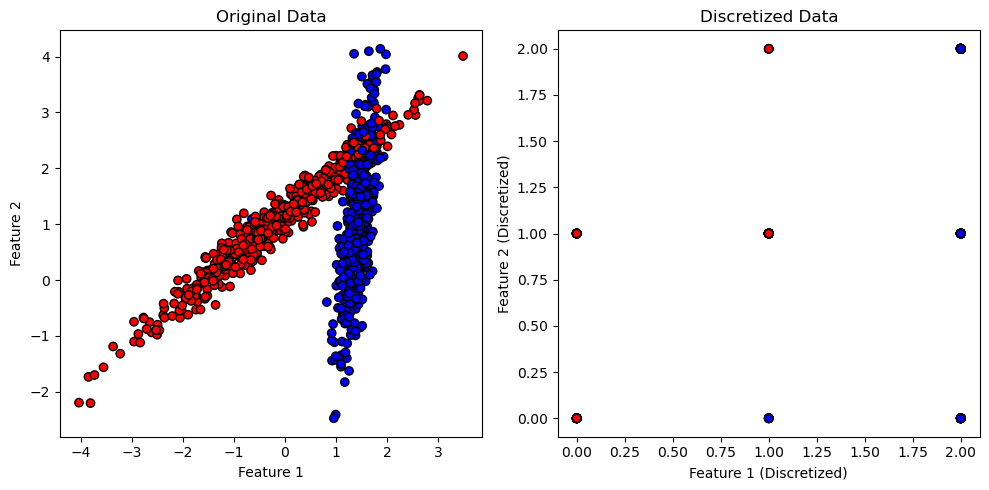

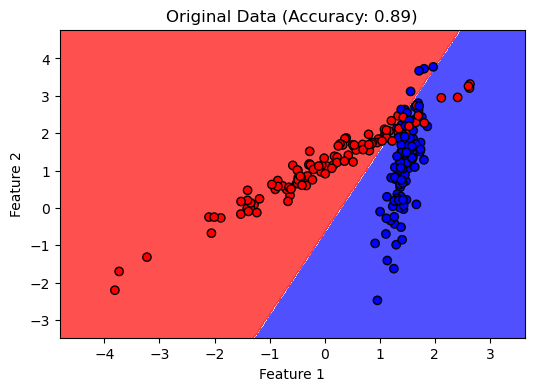

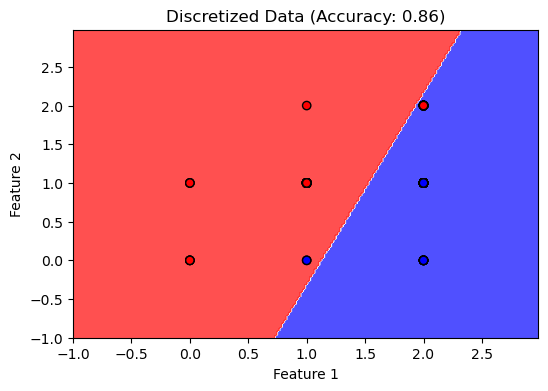

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, n_clusters_per_class=1, random_state=42)

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Step 3: Perform feature discretization
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X[:, :2])

# Step 4: Visualize the discretized data
plt.subplot(1, 2, 2)
plt.scatter(X_discretized[:, 0], X_discretized[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Discretized Data')
plt.xlabel('Feature 1 (Discretized)')
plt.ylabel('Feature 2 (Discretized)')
plt.tight_layout()
plt.show()

# Step 5: Train a logistic regression model on the original data
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Step 6: Train a logistic regression model on the discretized data
X_train_discretized, X_test_discretized, _, _ = train_test_split(X_discretized, y, test_size=0.2, random_state=42)
model_discretized = LogisticRegression()
model_discretized.fit(X_train_discretized, y_train)
y_pred_discretized = model_discretized.predict(X_test_discretized)
accuracy_discretized = accuracy_score(y_test, y_pred_discretized)

# Step 7: Plot decision boundaries for both models
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 4))
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(model_original, X_test, y_test, f'Original Data (Accuracy: {accuracy_original:.2f})')
plot_decision_boundary(model_discretized, X_test_discretized, y_test, f'Discretized Data (Accuracy: {accuracy_discretized:.2f})')
